In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import seaborn as sns


In [157]:
# Removes Warnings
import warnings
warnings.filterwarnings('ignore')

In [158]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [159]:
#df = pd.read_csv('Shill_Bidding_Dataset.csv')
#df.head()

In [160]:
len(data)
data.shape

(10000, 12)

In [161]:
data.isnull().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             4
Age                6
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    4
Exited             0
dtype: int64

In [162]:
data.describe()

,CustomerId,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,9994.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,9996.000000,10000.000000
mean,1.569094e+07,650.528800,38.925255,5.012800,76485.889288,1.530200,0.70550,0.515100,100074.744083,0.203700
std,7.193619e+04,96.653299,10.489248,2.892174,62397.405202,0.581654,0.45584,0.499797,57515.774555,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,50974.077500,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100168.240000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CredRate         10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           9996 non-null   object 
 4   Age              9994 non-null   float64
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   Prod Number      10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   ActMem           10000 non-null  int64  
 10  EstimatedSalary  9996 non-null   float64
 11  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


In [164]:
data['HasCrCard'] = data['HasCrCard'].astype('category')

data['HasCrCard'].value_counts()



HasCrCard
1    7055
0    2945
Name: count, dtype: int64

In [165]:
# Calculate the mean of the 'EstimatedSalary' column
mean_value = data['EstimatedSalary'].mean()

# Fill in the missing values in the 'EstimatedSalary' column with the calculated mean
data['EstimatedSalary'] = data['EstimatedSalary'].fillna(mean_value)

In [166]:
# Count the occurrences of each value in the 'Gender' column
gender_value_counts = data['Gender'].value_counts()

# Display the count of each gender category
print("Gender value counts:")
print(gender_value_counts)

# Fill in the missing values in the 'Gender' column with the most common gender value
most_common_gender = gender_value_counts.idxmax()
data['Gender'] = data['Gender'].fillna(most_common_gender)

Gender value counts:
Gender
Male      5453
Female    4543
Name: count, dtype: int64


In [167]:
# Calculate the mode of the 'Age' column
mode_value = data['Age'].mode()

# Display the mode value of the 'Age' column
print("Mode value of Age column:", mode_value[0])

# Fill in the missing values in the 'Age' column with the calculated mode
data['Age'] = data['Age'].fillna(mode_value[0])

Mode value of Age column: 37.0


In [168]:
data.isnull().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    0
Exited             0
dtype: int64

In [169]:
# Rename selected columns using a dictionary of column name changes
data = data.rename(columns={
    'CredRate': 'CreditScore',
    'ActMem': 'IsActiveMember',
    'Prod Number': 'NumOfProducts',
    'Exited': 'Churn'
})

In [170]:
data.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [171]:
data.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Churn'],
      dtype='object')

In [172]:
# Drop the 'CustomerId' column from the dataset
data.drop(labels=['CustomerId'], axis=1, inplace=True)

# Extract the 'Churn' column and drop it from the dataset
column_churn = data['Churn']
data.drop(labels=['Churn'], axis=1, inplace=True)

# Insert the 'Churn' column at the end of the dataset
data.insert(len(data.columns), 'Churn', column_churn.values)

# Display the updated column names after repositioning the 'Churn' column
print("Updated column names after repositioning 'Churn' column:")
print(data.columns)

Updated column names after repositioning 'Churn' column:
Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Churn'],
      dtype='object')


In [173]:
# Convert selected columns to the 'category' data type
data["Geography"] = data["Geography"].astype('category')
data["Gender"] = data["Gender"].astype('category')
data["HasCrCard"] = data["HasCrCard"].astype('category')
data["Churn"] = data["Churn"].astype('category')
data["IsActiveMember"] = data["IsActiveMember"].astype('category')

# Display the data types of all columns after conversion
print("Data types of columns after conversion:")
print(data.dtypes)

Data types of columns after conversion:
CreditScore           int64
Geography          category
Gender             category
Age                 float64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Churn              category
dtype: object


In [174]:
# Count the occurrences of each churn category (0 and 1)
churn_counts = data['Churn'].value_counts()
churn_counts

Churn
0    7963
1    2037
Name: count, dtype: int64

In [175]:
# Calculate the percentage of churned and non-churned customers
percentage_churned = data['Churn'].value_counts(normalize=True) * 100
percentage_churned

Churn
0    79.63
1    20.37
Name: proportion, dtype: float64

In [176]:
# Calculate the percentage of customers with a credit card
percentage_has_cr_card = data['HasCrCard'].value_counts(normalize=True) * 100
percentage_has_cr_card

HasCrCard
1    70.55
0    29.45
Name: proportion, dtype: float64

In [177]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [178]:
# Group the data by the 'Churn' column and calculate the mean for each group
summary_churn = data.groupby('Churn')

In [179]:
summary_churn.describe()

CreditScore                                                             \
            count        mean         std    min    25%    50%    75%    max   
Churn                                                                          
0          7963.0  651.853196   95.653837  405.0  585.0  653.0  718.0  850.0   
1          2037.0  645.351497  100.321503  350.0  578.0  646.0  716.0  850.0   

          Age             ... NumOfProducts      EstimatedSalary  \
        count       mean  ...           75%  max           count   
Churn                     ...                                      
0      7963.0  37.411277  ...           2.0  3.0          7963.0   
1      2037.0  44.837997  ...           2.0  4.0          2037.0   

                                                                           \
                mean           std    min       25%        50%        75%   
Churn                                                                       
0       99718.932023  57397.636600  90.07  50783.49   99645.04  148596.50   
1      101465.677531  57912.418071  11.58  51907.72  102460.84  152422.91   

                  
             max  
Churn             
0      199992.48  
1      199808.10  

[2 rows x 48 columns]

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.000000,-0.004179,0.000842,0.006268,0.012238,-0.001352
Age,-0.004179,1.000000,-0.009996,0.028141,-0.030590,-0.007215
Tenure,0.000842,-0.009996,1.000000,-0.012254,0.013444,0.007407
Balance,0.006268,0.028141,-0.012254,1.000000,-0.304180,0.013129
NumOfProducts,0.012238,-0.030590,0.013444,-0.304180,1.000000,0.014132
EstimatedSalary,-0.001352,-0.007215,0.007407,0.013129,0.014132,1.000000


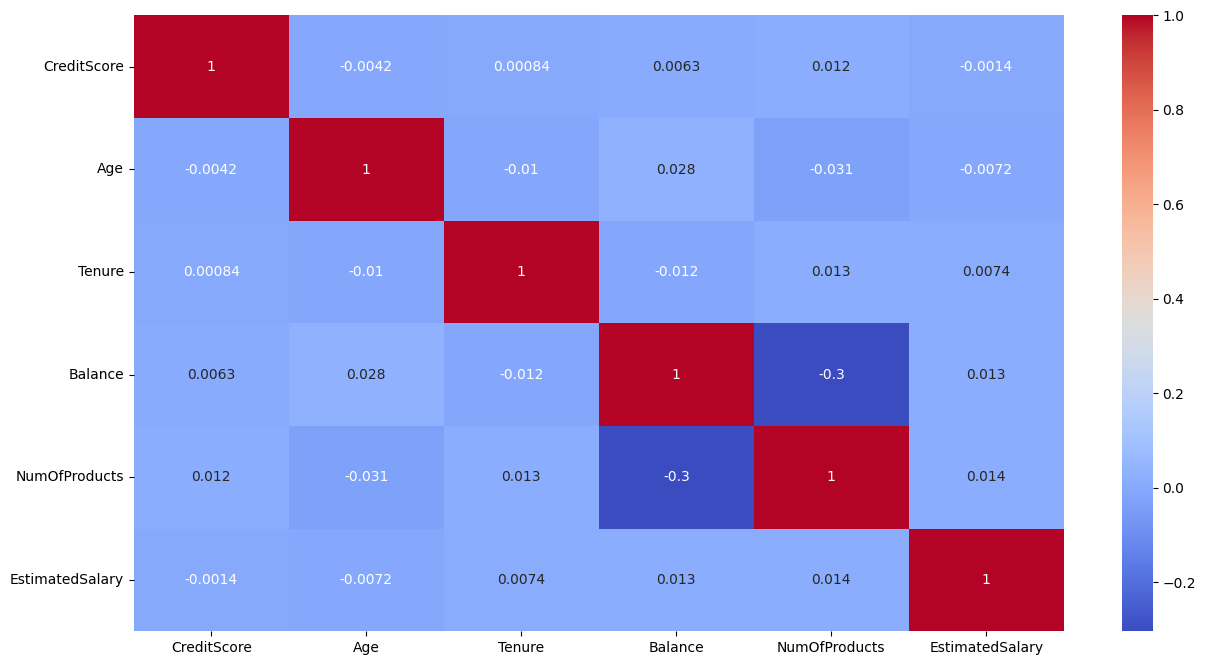

In [180]:


# Exclude non-numeric columns from the DataFrame
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr = numeric_data.corr()


# Create a colorful heatmap of the correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, cmap='coolwarm')

# Display the correlation matrix
corr

Text(0, 0.5, 'No of Customers')

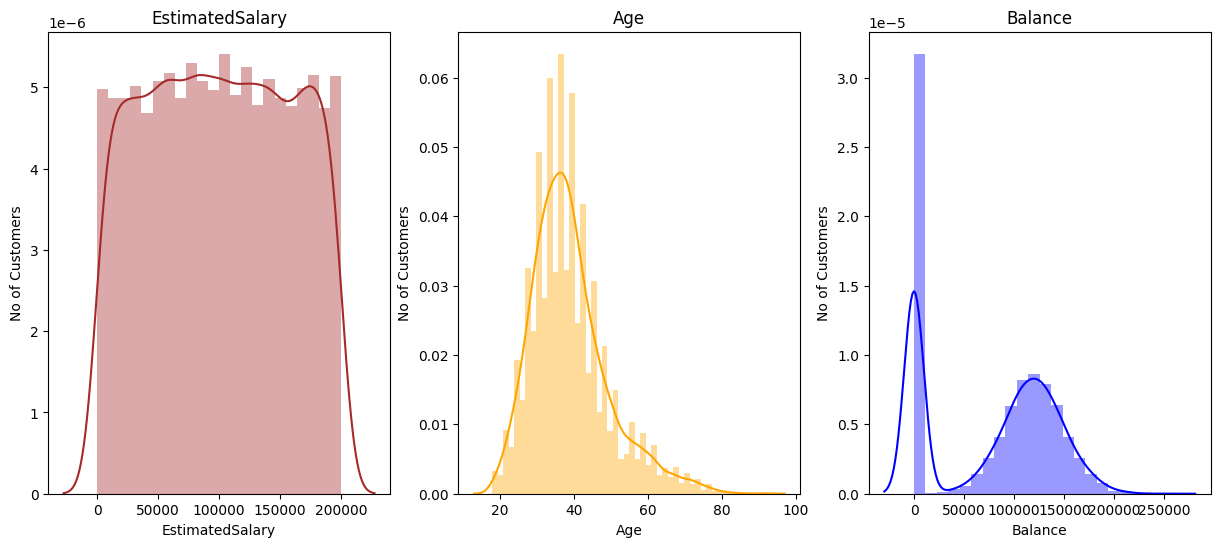

In [181]:
# Create a subplots layout with 3 columns and a defined figure size
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Plot the distribution of 'EstimatedSalary' in the first subplot
sns.distplot(data.EstimatedSalary, kde=True, color="brown", \
             ax=axes[0]).set_title('EstimatedSalary') 
axes[0].set_ylabel('No of Customers') 

# Plot the distribution of 'Age' in the second subplot
sns.distplot(data.Age, kde=True, color="orange", \
             ax=axes[1]).set_title('Age') 
axes[1].set_ylabel('No of Customers') 

# Plot the distribution of 'Balance' in the third subplot
sns.distplot(data.Balance, kde=True, color="blue", \
             ax=axes[2]).set_title('Balance') 
axes[2].set_ylabel('No of Customers') 

Text(0.5, 1.0, 'Customer Churn Distribution by Gender')

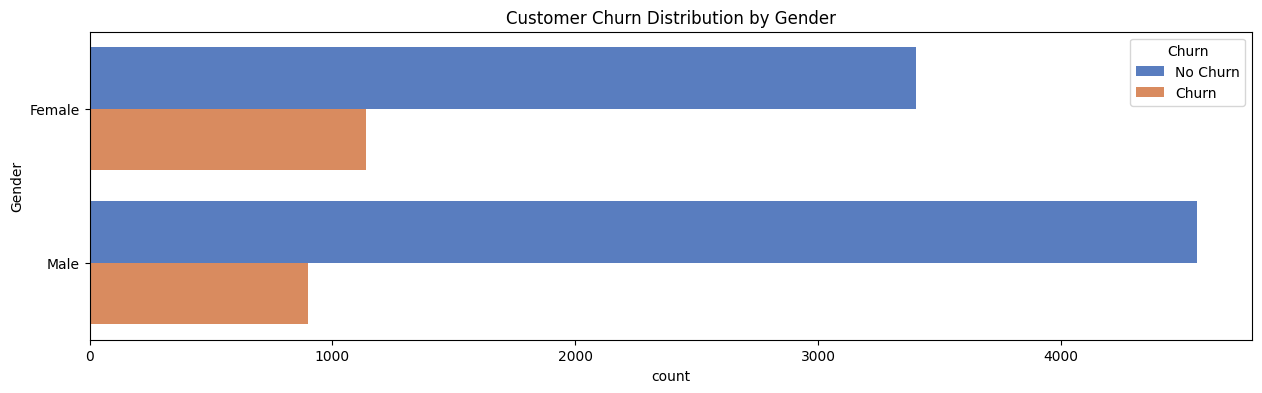

In [182]:
# Set the figure size for the plot
plt.figure(figsize=(15,4)) 

# Create a countplot to visualize churn distribution by gender
p = sns.countplot(y="Gender", hue='Churn', data=data, \
                  palette="muted") 

# Get the legend of the plot
legend = p.get_legend() 

# Modify the legend text to represent 'No Churn' and 'Churn'
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 

# Set the title for the plot
p.set_title('Customer Churn Distribution by Gender') 


Text(0.5, 1.0, 'Customer Geography Distribution')

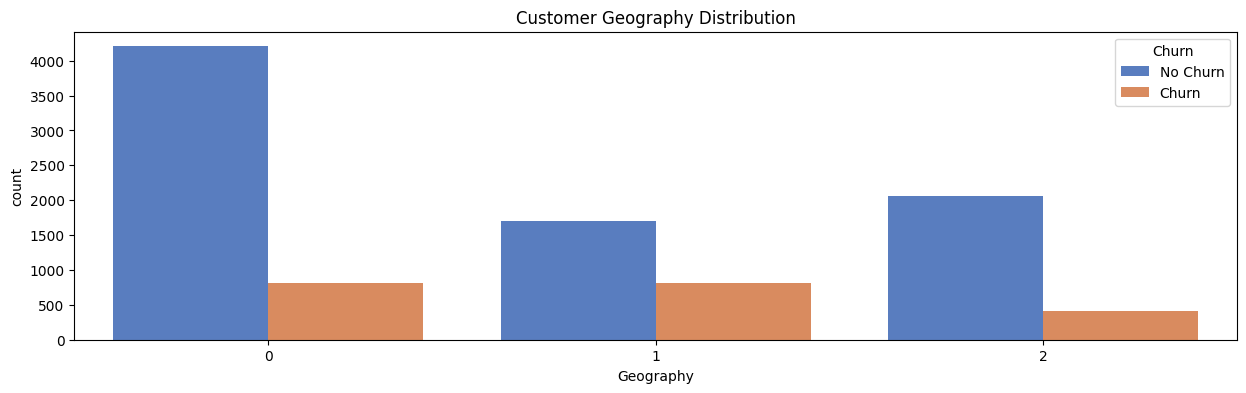

In [204]:
# Set the figure size for the plot
plt.figure(figsize=(15,4)) 

# Create a countplot to visualize churn distribution by geography
p = sns.countplot(x='Geography', hue='Churn', data=data, \
                  palette="muted") 

# Get the legend of the plot
legend = p.get_legend() 

# Modify the legend text to represent 'No Churn' and 'Churn'
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 

# Set the title for the plot
p.set_title('Customer Geography Distribution') 


Text(0.5, 1.0, 'Customer Distribution by Product')

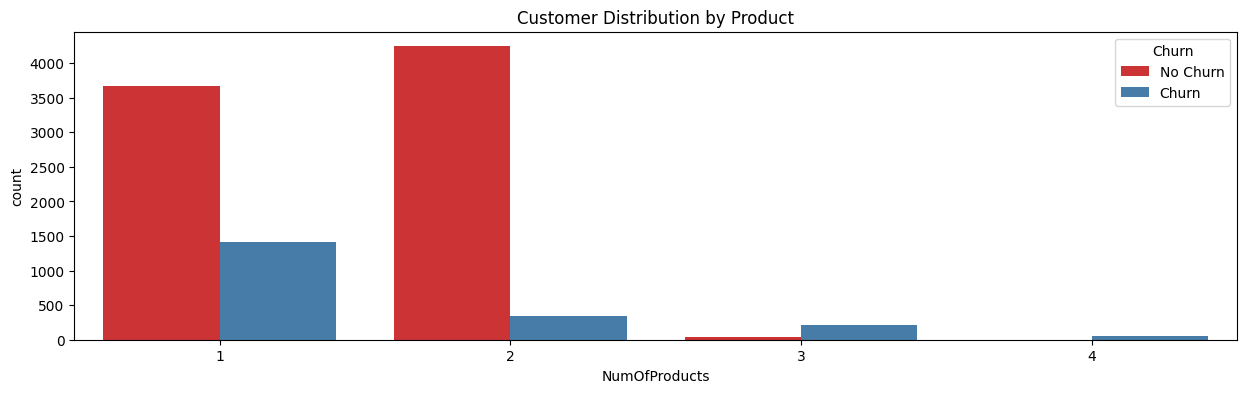

In [184]:
# Set the figure size for the plot
plt.figure(figsize=(15,4)) 

# Create a countplot to visualize churn distribution by number of products
p = sns.countplot(x='NumOfProducts', hue='Churn', data=data, \
                  palette="Set1")  # Using the "Set2" palette

# Get the legend of the plot
legend = p.get_legend() 

# Modify the legend text to represent 'No Churn' and 'Churn'
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 

# Set the title for the plot
p.set_title('Customer Distribution by Product')

Text(0.5, 1.0, 'Customer Age - churn vs no churn')

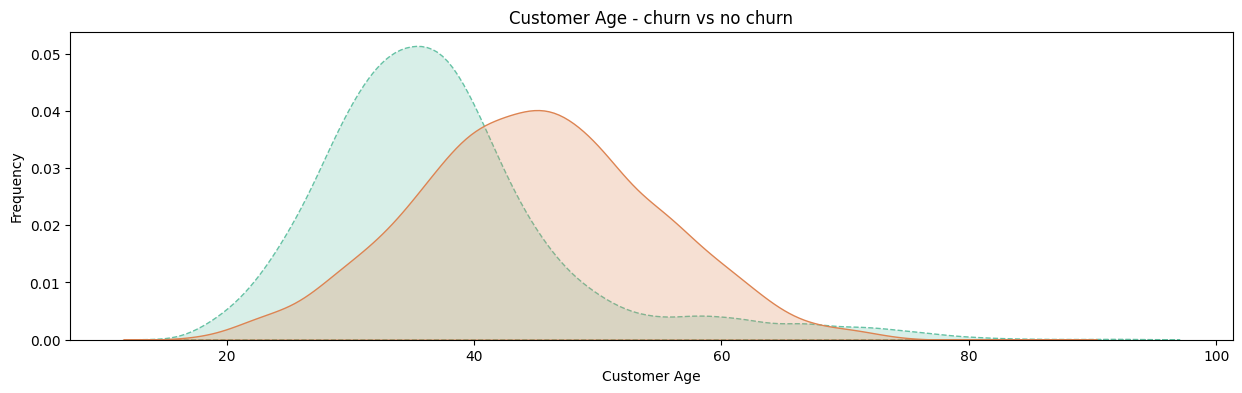

In [185]:
# Set the figure size for the plot
plt.figure(figsize=(15,4)) 

# Create kernel density plots (KDE) for customer age based on churn status
ax = sns.kdeplot(data.loc[(data['Churn'] == 0), 'Age'], \
                 color=sns.color_palette("Set2")[0], \
                 shade=True, label='no churn', linestyle='--')

ax = sns.kdeplot(data.loc[(data['Churn'] == 1), 'Age'], \
                 color=sns.color_palette("deep")[1], \
                 shade=True, label='churn')

# Set labels for x and y axes
ax.set(xlabel='Customer Age', ylabel='Frequency') 

# Set the title for the plot
plt.title('Customer Age - churn vs no churn')

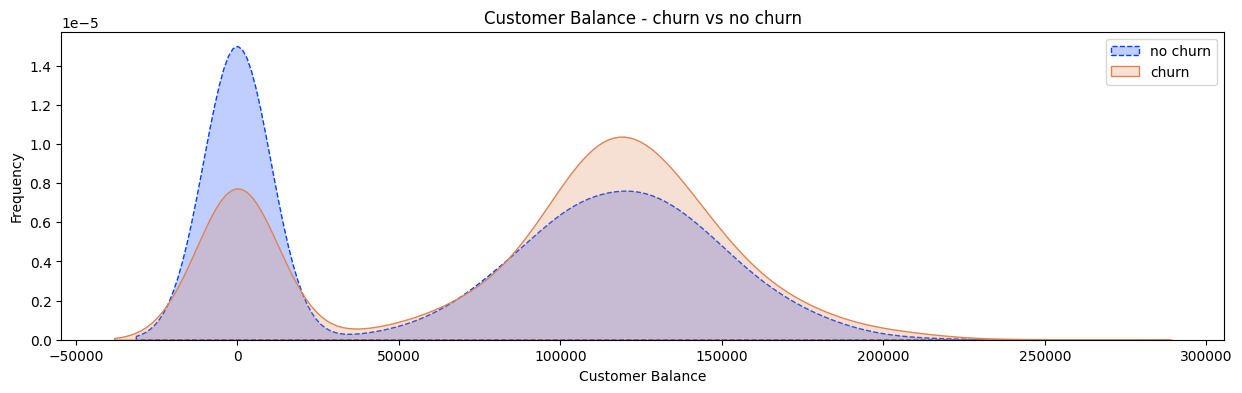

In [186]:
# Create a figure with a specific size
plt.figure(figsize=(15,4)) 

# Plotting the distribution of balances for customers who didn't churn (no churn category)
ax = sns.kdeplot(data.loc[(data['Churn'] == 0),'Balance'], \
                 color=sns.color_palette("bright")[0], \
                 shade=True, label='no churn', linestyle='--') 

# Plotting the distribution of balances for customers who churned (churn category)
ax = sns.kdeplot(data.loc[(data['Churn'] == 1),'Balance'], \
                 color=sns.color_palette("deep")[1], \
                 shade=True, label='churn') 

# Setting labels for x and y axes
ax.set(xlabel='Customer Balance', ylabel='Frequency') 

# Setting the title of the plot
plt.title('Customer Balance - churn vs no churn')

# Adding a legend to the plot
plt.legend()

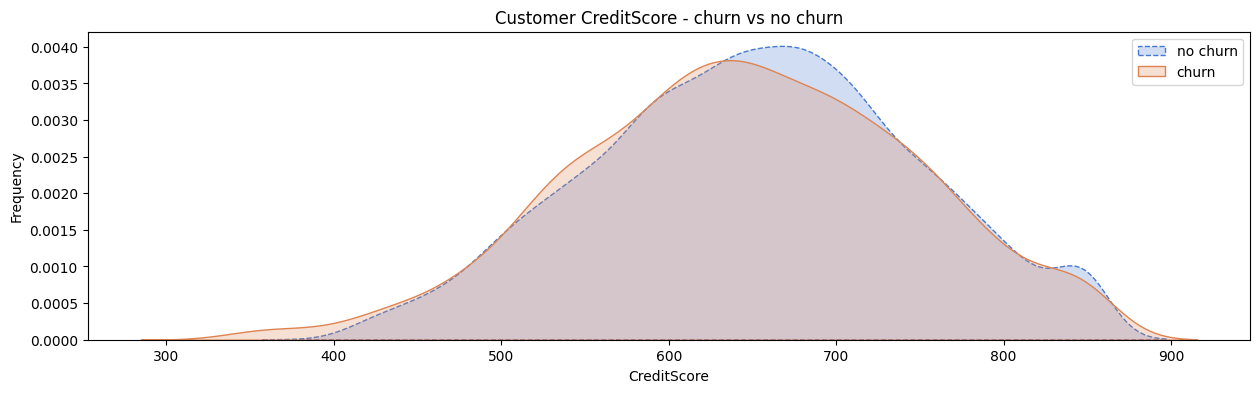

In [187]:
# Set the figure size
plt.figure(figsize=(15, 4))

# Create a KDE plot for credit scores of customers who did not churn
ax = sns.kdeplot(data.loc[(data['Churn'] == 0), 'CreditScore'], \
                 color=sns.color_palette("muted")[0], \
                 shade=True, label='no churn', linestyle='--')

# Create a KDE plot for credit scores of customers who churned
ax = sns.kdeplot(data.loc[(data['Churn'] == 1), 'CreditScore'], \
                 color=sns.color_palette("deep")[1], \
                 shade=True, label='churn')

# Set labels for x-axis and y-axis
ax.set(xlabel='CreditScore', ylabel='Frequency')

# Set the title of the plot
plt.title('Customer CreditScore - churn vs no churn')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


Text(0, 0.5, 'Balance')

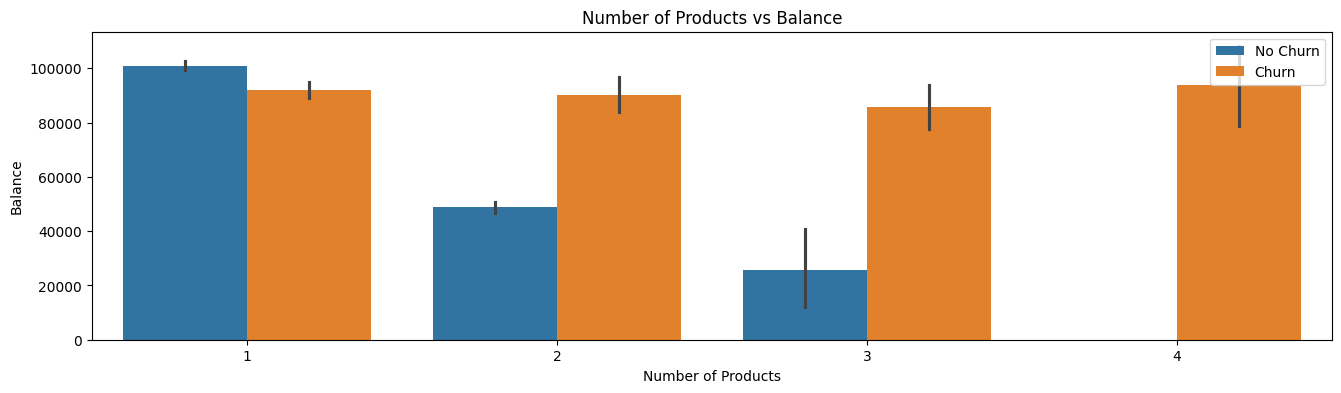

In [188]:
# Create a bar plot to visualize the relationship between the number of products and the balance
plt.figure(figsize=(16, 4)) 
p = sns.barplot(x='NumOfProducts', y='Balance', hue='Churn',\
                data=data, palette="tab10") 

# Add legend and adjust its labels
p.legend(loc='upper right') 
legend = p.get_legend() 
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 

# Set title and axis labels
p.set_title('Number of Products vs Balance')  
p.set_xlabel('Number of Products')
p.set_ylabel('Balance')

Modelling the data

In [189]:
# Import the RandomForestClassifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Import train_test_split to split the dataset
from sklearn.model_selection import train_test_split 

In [190]:
# Display the data types of each column in the dataset
data.dtypes 

CreditScore           int64
Geography          category
Gender             category
Age                 float64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Churn              category
dtype: object

In [191]:
# Convert categorical variables to numeric using label encoding
data["Geography"] = data["Geography"].astype('category').cat.codes
data["Gender"] = data["Gender"].astype('category').cat.codes
data["HasCrCard"] = data["HasCrCard"].astype('category').cat.codes
data["Churn"] = data["Churn"].astype('category').cat.codes

In [192]:
# Define the target variable and the feature matrix
target = 'Churn'
X = data.drop('Churn', axis=1)
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123, stratify=y)

In [193]:
# Create a RandomForestClassifier with specified parameters
forest = RandomForestClassifier(n_estimators=500, random_state=1)

# Fit the model on the training data
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

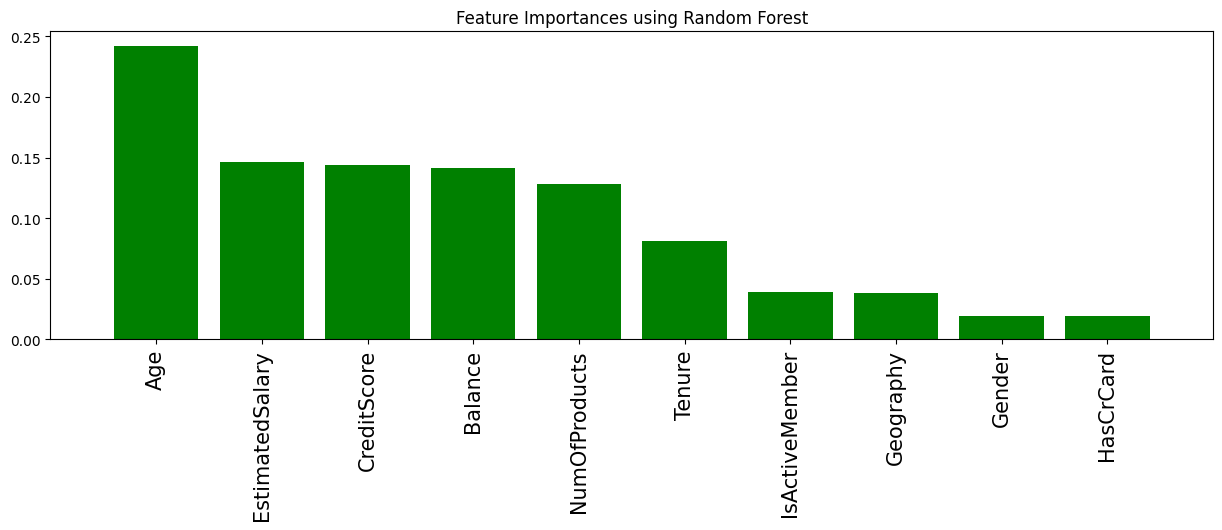

In [194]:
# Calculate feature importances from the trained Random Forest model
importances = forest.feature_importances_

# Get the column names (features)
features = data.drop(['Churn'], axis=1).columns

# Sort the indices based on feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create a bar plot to visualize feature importances
plt.figure(figsize=(15, 4))
plt.title("Feature Importances using Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], color="green", align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation='vertical', fontsize=15)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [195]:
# Create a DataFrame to store feature importances and their corresponding features
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": importances})

# Display the feature importance DataFrame
print(feature_importance_df)

           Feature  Importance
0      CreditScore    0.143886
1        Geography    0.038548
2           Gender    0.019299
3              Age    0.241954
4           Tenure    0.081503
5          Balance    0.141760
6    NumOfProducts    0.128461
7        HasCrCard    0.019139
8   IsActiveMember    0.038878
9  EstimatedSalary    0.146571


Model Building

In [196]:
import statsmodels.api as sm

# Select the top 5 important features
top5_features = ['Age', 'EstimatedSalary', 'CreditScore', 'Balance', 'NumOfProducts']

# Build the logistic regression model
logReg = sm.Logit(y_train, X_train[top5_features])
logistic_regression = logReg.fit()

Optimization terminated successfully.
         Current function value: 0.472882
         Iterations 6


In [197]:
# Print the summary of the logistic regression model
print(logistic_regression.summary())

# Print the parameters (coefficients) of the model
print(logistic_regression.params)

                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 8500
Model:                          Logit   Df Residuals:                     8495
Method:                           MLE   Df Model:                            4
Date:                Thu, 07 Mar 2024   Pseudo R-squ.:                 0.06437
Time:                        06:12:25   Log-Likelihood:                -4019.5
converged:                       True   LL-Null:                       -4296.0
Covariance Type:            nonrobust   LLR p-value:                2.199e-118
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Age                 0.0483      0.002     20.655      0.000       0.044       0.053
EstimatedSalary -1.028e-06   4.77e-07     -2.156      0.031   -1.96e-06   -9.34e-08
CreditScore        -0.0045      

In [198]:
# Create a function to compute the predicted log-odds

coef = logistic_regression.params

def predicted_log_odds(coef, Age, EstimatedSalary, CreditScore, Balance, NumOfProducts):
    """
    Compute the predicted log-odds of churning based on logistic regression coefficients and feature values.
    
    Parameters:
    coef (array-like): Coefficients from the logistic regression model.
    Age (float): Customer's age.
    EstimatedSalary (float): Estimated salary of the customer.
    CreditScore (float): Credit score of the customer.
    Balance (float): Customer's bank balance.
    NumOfProducts (float): Number of products purchased by the customer.
    
    Returns:
    float: Predicted log-odds of churning.
    """
    return coef[0] * Age + coef[1] * EstimatedSalary + coef[2] * CreditScore + coef[3] * Balance + coef[4] * NumOfProducts


In [199]:
import numpy as np

# Calculate the predicted log-odds using the coefficients and feature values
predicted_log_odds = predicted_log_odds(coef, 50, 100000, 600, 100000, 2)

# Calculate the probability of churning using the predicted log-odds
probability_of_churning = np.exp(predicted_log_odds) / (1 + np.exp(predicted_log_odds))

# Print the probability
print("The customer has a {:.2f}% chance of churn.".format(probability_of_churning * 100))


The customer has a 30.94% chance of churn.


In [200]:
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression model with specified parameters
clf = LogisticRegression(random_state=0, solver='lbfgs')

# Fit the model on the training data using the top 5 features
clf.fit(X_train[top5_features], y_train)

# Make predictions on the test data
predictions = clf.predict(X_test[top5_features])

# Get the predicted probabilities for each class
predicted_probabilities = clf.predict_proba(X_test[top5_features])

# Calculate the accuracy score of the model on the test data
accuracy = clf.score(X_test[top5_features], y_test)

# Print the predicted class labels, predicted probabilities, and accuracy score
print("Predicted Labels:", predictions)

Predicted Labels: [0 0 0 ... 0 0 0]


In [201]:
print("Predicted Probabilities:", predicted_probabilities)

Predicted Probabilities: [[0.6093184  0.3906816 ]
 [0.72674296 0.27325704]
 [0.75844662 0.24155338]
 ...
 [0.597793   0.402207  ]
 [0.83677568 0.16322432]
 [0.70988174 0.29011826]]


In [202]:
print("Accuracy Score:", accuracy)

Accuracy Score: 0.7846666666666666


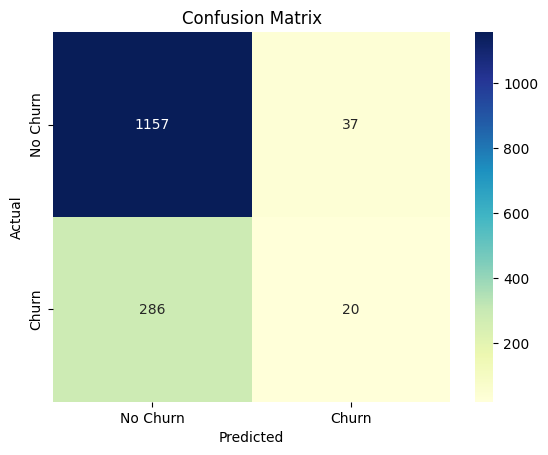

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu",
            xticklabels=["No Churn", "Churn"],
            yticklabels=["No Churn", "Churn"])

# Add labels and title to the plot
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Display the plot
plt.show()